In [1]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 2. Đọc file csv và gắng index với giá Close
df_DaNang = pd.read_csv('/content/drive/MyDrive/ptdlkd/AQI_DaNang_Done.csv')
df1_DaNang=df_DaNang.reset_index()['AQI']

df_HaNoi = pd.read_csv('/content/drive/MyDrive/ptdlkd/AQI_HaNoi_Done.csv')
df1_HaNoi=df_HaNoi.reset_index()['AQI']

df_VietTri = pd.read_csv('/content/drive/MyDrive/ptdlkd/AQI_VietTri_Done.csv')
df1_VietTri=df_VietTri.reset_index()['AQI']

In [4]:
df_DaNang,df_HaNoi,df_VietTri

(            date  pm25  pm10    o3   no2   so2   co    year  AQI_pm25  \
 0     2019-01-01  26.0   8.0  28.0  12.0   6.0  1.0  2019.0      52.0   
 1     2019-01-02  26.0  11.0  69.0  16.0  10.0  4.0  2019.0      52.0   
 2     2019-01-03  32.0  15.0  68.0  15.0   1.0  2.0  2019.0      64.0   
 3     2019-01-04  40.0  15.0  37.0   9.0   1.0  3.0  2019.0      80.0   
 4     2019-01-05  45.0  32.0  48.0  12.0   1.0  2.0  2019.0      90.0   
 ...          ...   ...   ...   ...   ...   ...  ...     ...       ...   
 1882  2024-02-26  32.0  16.0  72.0  16.0  11.0  2.0  2024.0      64.0   
 1883  2024-02-27  32.0  12.0  35.0  14.0  11.0  3.0  2024.0      64.0   
 1884  2024-02-28  17.0  23.0  73.0  14.0  11.0  4.0  2024.0      34.0   
 1885  2024-02-29  37.0  14.0  50.0  15.0  11.0  2.0  2024.0      74.0   
 1886  2024-03-01  21.0   3.0  72.0  15.0  11.0  2.0  2024.0      42.0   
 
       AQI_pm10   AQI_o3  AQI_no2  AQI_so2  AQI_co   AQI  
 0          8.0   8.7500      6.0      2.4     5.0 

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))

df1_DaNang=scaler.fit_transform(np.array(df1_DaNang).reshape(-1,1))
df1_HaNoi=scaler.fit_transform(np.array(df1_HaNoi).reshape(-1,1))
df1_VietTri=scaler.fit_transform(np.array(df1_VietTri).reshape(-1,1))


In [6]:
# Calculate train and test sizes for each city and split ratio

# Da Nang
train_size_DaNang_70 = int(0.7 * len(df_DaNang))
test_size_DaNang_30 = len(df_DaNang) - train_size_DaNang_70

train_size_DaNang_80 = int(0.8 * len(df_DaNang))
test_size_DaNang_20 = len(df_DaNang) - train_size_DaNang_80

train_size_DaNang_90 = int(0.9 * len(df_DaNang))
test_size_DaNang_10 = len(df_DaNang) - train_size_DaNang_90

# Ha Noi
train_size_HaNoi_70 = int(0.7 * len(df_HaNoi))
test_size_HaNoi_30 = len(df_HaNoi) - train_size_HaNoi_70

train_size_HaNoi_80 = int(0.8 * len(df_HaNoi))
test_size_HaNoi_20 = len(df_HaNoi) - train_size_HaNoi_80

train_size_HaNoi_90 = int(0.9 * len(df_HaNoi))
test_size_HaNoi_10 = len(df_HaNoi) - train_size_HaNoi_90

# Viet Tri
train_size_VietTri_70 = int(0.7 * len(df_VietTri))
test_size_VietTri_30 = len(df_VietTri) - train_size_VietTri_70

train_size_VietTri_80 = int(0.8 * len(df_VietTri))
test_size_VietTri_20 = len(df_VietTri) - train_size_VietTri_80

train_size_VietTri_90 = int(0.9 * len(df_VietTri))
test_size_VietTri_10 = len(df_VietTri) - train_size_VietTri_90

# Create train and test datasets for each city and split ratio

# Da Nang
train_data_DaNang_70 = df1_DaNang[:train_size_DaNang_70]
test_data_DaNang_30 = df1_DaNang[train_size_DaNang_70:train_size_DaNang_70+test_size_DaNang_30]

train_data_DaNang_80 = df1_DaNang[:train_size_DaNang_80]
test_data_DaNang_20 = df1_DaNang[train_size_DaNang_80:train_size_DaNang_80+test_size_DaNang_20]

train_data_DaNang_90 = df1_DaNang[:train_size_DaNang_90]
test_data_DaNang_10 = df1_DaNang[train_size_DaNang_90:train_size_DaNang_90+test_size_DaNang_10]

# Ha Noi
train_data_HaNoi_70 = df1_HaNoi[:train_size_HaNoi_70]
test_data_HaNoi_30 = df1_HaNoi[train_size_HaNoi_70:train_size_HaNoi_70+test_size_HaNoi_30]

train_data_HaNoi_80 = df1_HaNoi[:train_size_HaNoi_80]
test_data_HaNoi_20 = df1_HaNoi[train_size_HaNoi_80:train_size_HaNoi_80+test_size_HaNoi_20]

train_data_HaNoi_90 = df1_HaNoi[:train_size_HaNoi_90]
test_data_HaNoi_10 = df1_HaNoi[train_size_HaNoi_90:train_size_HaNoi_90+test_size_HaNoi_10]

# Viet Tri
train_data_VietTri_70 = df1_VietTri[:train_size_VietTri_70]
test_data_VietTri_30 = df1_VietTri[train_size_VietTri_70:train_size_VietTri_70+test_size_VietTri_30]

train_data_VietTri_80 = df1_VietTri[:train_size_VietTri_80]
test_data_VietTri_20 = df1_VietTri[train_size_VietTri_80:train_size_VietTri_80+test_size_VietTri_20]

train_data_VietTri_90 = df1_VietTri[:train_size_VietTri_90]
test_data_VietTri_10 = df1_VietTri[train_size_VietTri_90:train_size_VietTri_90+test_size_VietTri_10]

# Print to verify (optional)
print("Da Nang 70-30 Split: Train size:", len(train_data_DaNang_70), "Test size:", len(test_data_DaNang_30))
print("Da Nang 80-20 Split: Train size:", len(train_data_DaNang_80), "Test size:", len(test_data_DaNang_20))
print("Da Nang 90-10 Split: Train size:", len(train_data_DaNang_90), "Test size:", len(test_data_DaNang_10))

print("Ha Noi 70-30 Split: Train size:", len(train_data_HaNoi_70), "Test size:", len(test_data_HaNoi_30))
print("Ha Noi 80-20 Split: Train size:", len(train_data_HaNoi_80), "Test size:", len(test_data_HaNoi_20))
print("Ha Noi 90-10 Split: Train size:", len(train_data_HaNoi_90), "Test size:", len(test_data_HaNoi_10))

print("Viet Tri 70-30 Split: Train size:", len(train_data_VietTri_70), "Test size:", len(test_data_VietTri_30))
print("Viet Tri 80-20 Split: Train size:", len(train_data_VietTri_80), "Test size:", len(test_data_VietTri_20))
print("Viet Tri 90-10 Split: Train size:", len(train_data_VietTri_90), "Test size:", len(test_data_VietTri_10))


Da Nang 70-30 Split: Train size: 1320 Test size: 567
Da Nang 80-20 Split: Train size: 1509 Test size: 378
Da Nang 90-10 Split: Train size: 1698 Test size: 189
Ha Noi 70-30 Split: Train size: 1320 Test size: 567
Ha Noi 80-20 Split: Train size: 1509 Test size: 378
Ha Noi 90-10 Split: Train size: 1698 Test size: 189
Viet Tri 70-30 Split: Train size: 1320 Test size: 567
Viet Tri 80-20 Split: Train size: 1509 Test size: 378
Viet Tri 90-10 Split: Train size: 1698 Test size: 189


In [7]:
# 4. Chia train test theo 7-3, 8-2, 9-1

train_size_DaNang = int(0.7 * len(df_DaNang))
test_size_DaNang = int(0.3 * len(df_DaNang))

train_size_HaNoi = int(0.7 * len(df_HaNoi))
test_size_HaNoi = int(0.3 * len(df_HaNoi))

train_size_VietTri = int(0.7 * len(df_VietTri))
test_size_VietTri = int(0.3 * len(df_VietTri))

#DaNang
train_data_DaNang_70 = df1_DaNang[:train_size_DaNang]
test_data_DaNang_30 = df1_DaNang[train_size_DaNang:train_size_DaNang+test_size_DaNang]
#Ha Noi
train_data_HaNoi_70 = df1_HaNoi[:train_size_HaNoi]
test_data_HaNoi_30 = df1_HaNoi[train_size_HaNoi:train_size_HaNoi+test_size_HaNoi]
#VietTri
train_data_VietTri_70 = df1_VietTri[:train_size_VietTri]
test_data_VietTri_30 = df1_VietTri[train_size_VietTri:train_size_VietTri+test_size_VietTri]

In [8]:
print(train_data_DaNang_70.shape)
print(test_data_DaNang_30.shape)

(1320, 1)
(566, 1)


In [9]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
time_step = 100

# Create datasets for Da Nang 70-30 split
X_train_DaNang_70, y_train_DaNang_70 = create_dataset(train_data_DaNang_70, time_step)
X_test_DaNang_30, y_test_DaNang_30 = create_dataset(test_data_DaNang_30, time_step)

# Create datasets for Ha Noi 70-30 split
X_train_HaNoi_70, y_train_HaNoi_70 = create_dataset(train_data_HaNoi_70, time_step)
X_test_HaNoi_30, y_test_HaNoi_30 = create_dataset(test_data_HaNoi_30, time_step)

# Create datasets for Viet Tri 70-30 split
X_train_VietTri_70, y_train_VietTri_70 = create_dataset(train_data_VietTri_70, time_step)
X_test_VietTri_30, y_test_VietTri_30 = create_dataset(test_data_VietTri_30, time_step)

# Da Nang 80-20 split
X_train_DaNang_80, y_train_DaNang_80 = create_dataset(train_data_DaNang_80, time_step)
X_test_DaNang_20, y_test_DaNang_20 = create_dataset(test_data_DaNang_20, time_step)

# Ha Noi 80-20 split
X_train_HaNoi_80, y_train_HaNoi_80 = create_dataset(train_data_HaNoi_80, time_step)
X_test_HaNoi_20, y_test_HaNoi_20 = create_dataset(test_data_HaNoi_20, time_step)

# Viet Tri 80-20 split
X_train_VietTri_80, y_train_VietTri_80 = create_dataset(train_data_VietTri_80, time_step)
X_test_VietTri_20, y_test_VietTri_20 = create_dataset(test_data_VietTri_20, time_step)

# Da Nang 90-10 split
X_train_DaNang_90, y_train_DaNang_90 = create_dataset(train_data_DaNang_90, time_step)
X_test_DaNang_10, y_test_DaNang_10 = create_dataset(test_data_DaNang_10, time_step)

# Ha Noi 90-10 split
X_train_HaNoi_90, y_train_HaNoi_90 = create_dataset(train_data_HaNoi_90, time_step)
X_test_HaNoi_10, y_test_HaNoi_10 = create_dataset(test_data_HaNoi_10, time_step)

# Viet Tri 90-10 split
X_train_VietTri_90, y_train_VietTri_90 = create_dataset(train_data_VietTri_90, time_step)
X_test_VietTri_10, y_test_VietTri_10 = create_dataset(test_data_VietTri_10, time_step)

In [11]:
#Dang nang
## 8 - 2
X_train_DaNang_80 =X_train_DaNang_80.reshape(X_train_DaNang_80.shape[0],X_train_DaNang_80.shape[1] , 1)
X_test_DaNang_20 = X_test_DaNang_20.reshape(X_test_DaNang_20.shape[0],X_test_DaNang_20.shape[1] , 1)
## 7 - 3
X_train_DaNang_70 =X_train_DaNang_70.reshape(X_train_DaNang_70.shape[0],X_train_DaNang_70.shape[1] , 1)
X_test_DaNang_30 = X_test_DaNang_30.reshape(X_test_DaNang_30.shape[0],X_test_DaNang_30.shape[1] , 1)
## 9 - 1
X_train_DaNang_90 =X_train_DaNang_90.reshape(X_train_DaNang_90.shape[0],X_train_DaNang_90.shape[1] , 1)
X_test_DaNang_10 = X_test_DaNang_10.reshape(X_test_DaNang_10.shape[0],X_test_DaNang_10.shape[1] , 1)
#HaNoi
## 8 - 2
X_train_HaNoi_80 =X_train_HaNoi_80.reshape(X_train_HaNoi_80.shape[0],X_train_HaNoi_80.shape[1] , 1)
X_test_HaNoi_20 = X_test_HaNoi_20.reshape(X_test_HaNoi_20.shape[0],X_test_HaNoi_20.shape[1] , 1)
## 7 - 3
X_train_HaNoi_70 =X_train_HaNoi_70.reshape(X_train_HaNoi_70.shape[0],X_train_HaNoi_70.shape[1] , 1)
X_test_HaNoi_30 = X_test_HaNoi_30.reshape(X_test_HaNoi_30.shape[0],X_test_HaNoi_30.shape[1] , 1)
## 9 - 1
X_train_HaNoi_90 =X_train_HaNoi_90.reshape(X_train_HaNoi_90.shape[0],X_train_HaNoi_90.shape[1] , 1)
X_test_HaNoi_10 = X_test_HaNoi_10.reshape(X_test_HaNoi_10.shape[0],X_test_HaNoi_10.shape[1] , 1)
#VietTri
## 8 - 2
X_train_VietTri_80 =X_train_VietTri_80.reshape(X_train_VietTri_80.shape[0],X_train_VietTri_80.shape[1] , 1)
X_test_VietTri_20 = X_test_VietTri_20.reshape(X_test_VietTri_20.shape[0],X_test_VietTri_20.shape[1] , 1)
## 7 - 3
X_train_VietTri_70 =X_train_VietTri_70.reshape(X_train_VietTri_70.shape[0],X_train_VietTri_70.shape[1] , 1)
X_test_VietTri_30 = X_test_VietTri_30.reshape(X_test_VietTri_30.shape[0],X_test_VietTri_30.shape[1] , 1)
## 9 - 1
X_train_VietTri_90 =X_train_VietTri_90.reshape(X_train_VietTri_90.shape[0],X_train_VietTri_90.shape[1] , 1)
X_test_VietTri_10 = X_test_VietTri_10.reshape(X_test_VietTri_10.shape[0],X_test_VietTri_10.shape[1] , 1)


In [12]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model_DaNang_7_3 = model
model_HaNoi_7_3 = model
model_VietTri_7_3 = model
model_DaNang_8_2 = model
model_HaNoi_8_2 = model
model_VietTri_8_2 = model
model_DaNang_9_1 = model
model_HaNoi_9_1 = model
model_VietTri_9_1 = model

In [13]:
# 9. Fit mô hình với dữ liệu train
##DaNang
print("model:DaNang")
model_DaNang_7_3.fit(X_train_DaNang_70,y_train_DaNang_70,validation_data=(X_test_DaNang_30,y_test_DaNang_30),epochs=100,batch_size=64,verbose=1)
model_DaNang_8_2.fit(X_train_DaNang_80,y_train_DaNang_80,validation_data=(X_test_DaNang_20,y_test_DaNang_20),epochs=100,batch_size=64,verbose=1)
model_DaNang_9_1.fit(X_train_DaNang_90,y_train_DaNang_90,validation_data=(X_test_DaNang_10,y_test_DaNang_10),epochs=100,batch_size=64,verbose=1)



model:DaNang
Epoch 1/100
20/20 [==============================] - 5s 121ms/step - loss: 0.0137 - val_loss: 0.0154
Epoch 2/100
20/20 [==============================] - 1s 54ms/step - loss: 0.0089 - val_loss: 0.0143
Epoch 3/100
20/20 [==============================] - 1s 51ms/step - loss: 0.0081 - val_loss: 0.0137
Epoch 4/100
20/20 [==============================] - 1s 49ms/step - loss: 0.0079 - val_loss: 0.0132
Epoch 5/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0078 - val_loss: 0.0129
Epoch 6/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0078 - val_loss: 0.0126
Epoch 7/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0077 - val_loss: 0.0125
Epoch 8/100
20/20 [==============================] - 1s 49ms/step - loss: 0.0077 - val_loss: 0.0122
Epoch 9/100
20/20 [==============================] - 1s 49ms/step - loss: 0.0078 - val_loss: 0.0121
Epoch 10/100
20/20 [==============================] - 1s 49ms/step - loss: 0.0077 - va

In [14]:
print("modve:HaNoi")
##HaNoi
model_HaNoi_7_3.fit(X_train_HaNoi_70,y_train_HaNoi_70,validation_data=(X_test_HaNoi_30,y_test_HaNoi_30),epochs=100,batch_size=64,verbose=1)
model_HaNoi_8_2.fit(X_train_HaNoi_80,y_train_HaNoi_80,validation_data=(X_test_HaNoi_20,y_test_HaNoi_20),epochs=100,batch_size=64,verbose=1)
model_HaNoi_9_1.fit(X_train_HaNoi_90,y_train_HaNoi_90,validation_data=(X_test_HaNoi_10,y_test_HaNoi_10),epochs=100,batch_size=64,verbose=1)


modve:HaNoi
Epoch 1/100
20/20 [==============================] - 1s 53ms/step - loss: 0.0205 - val_loss: 0.0204
Epoch 2/100
20/20 [==============================] - 1s 49ms/step - loss: 0.0157 - val_loss: 0.0162
Epoch 3/100
20/20 [==============================] - 1s 62ms/step - loss: 0.0146 - val_loss: 0.0172
Epoch 4/100
20/20 [==============================] - 2s 82ms/step - loss: 0.0149 - val_loss: 0.0164
Epoch 5/100
20/20 [==============================] - 2s 82ms/step - loss: 0.0145 - val_loss: 0.0160
Epoch 6/100
20/20 [==============================] - 1s 64ms/step - loss: 0.0146 - val_loss: 0.0160
Epoch 7/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0144 - val_loss: 0.0158
Epoch 8/100
20/20 [==============================] - 1s 49ms/step - loss: 0.0143 - val_loss: 0.0166
Epoch 9/100
20/20 [==============================] - 1s 49ms/step - loss: 0.0141 - val_loss: 0.0160
Epoch 10/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0142 - val_

In [15]:
print("model:VietTri")
##VietTri
model_VietTri_7_3.fit(X_train_VietTri_70,y_train_VietTri_70,validation_data=(X_test_VietTri_30,y_test_VietTri_30),epochs=100,batch_size=64,verbose=1)
model_VietTri_8_2.fit(X_train_VietTri_80,y_train_VietTri_80,validation_data=(X_test_VietTri_20,y_test_VietTri_20),epochs=100,batch_size=64,verbose=1)
model_VietTri_9_1.fit(X_train_VietTri_90,y_train_VietTri_90,validation_data=(X_test_VietTri_10,y_test_VietTri_10),epochs=100,batch_size=64,verbose=1)

model:VietTri
Epoch 1/100
20/20 [==============================] - 1s 52ms/step - loss: 0.0205 - val_loss: 0.0223
Epoch 2/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0166 - val_loss: 0.0214
Epoch 3/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0148 - val_loss: 0.0189
Epoch 4/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0139 - val_loss: 0.0183
Epoch 5/100
20/20 [==============================] - 1s 65ms/step - loss: 0.0132 - val_loss: 0.0181
Epoch 6/100
20/20 [==============================] - 2s 82ms/step - loss: 0.0127 - val_loss: 0.0172
Epoch 7/100
20/20 [==============================] - 2s 84ms/step - loss: 0.0125 - val_loss: 0.0178
Epoch 8/100
20/20 [==============================] - 1s 64ms/step - loss: 0.0123 - val_loss: 0.0175
Epoch 9/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0121 - val_loss: 0.0182
Epoch 10/100
20/20 [==============================] - 1s 50ms/step - loss: 0.0125 - va

In [16]:
##DaNang
train_predict_DaNang_7_3=model_DaNang_7_3.predict(X_train_DaNang_70)
y_pred_DaNang_7_3=model_DaNang_7_3.predict(X_test_DaNang_30)
train_predict_DaNang_8_2=model_DaNang_8_2.predict(X_train_DaNang_80)
y_pred_DaNang_8_2=model_DaNang_8_2.predict(X_test_DaNang_20)
train_predict_DaNang_9_1=model_DaNang_9_1.predict(X_train_DaNang_90)
y_pred_DaNang_9_1=model_DaNang_9_1.predict(X_test_DaNang_10)
##HaNoi
train_predict_HaNoi_7_3=model_HaNoi_7_3.predict(X_train_HaNoi_70)
y_pred_HaNoi_7_3=model_HaNoi_7_3.predict(X_test_HaNoi_30)
train_predict_HaNoi_8_2=model_HaNoi_8_2.predict(X_train_HaNoi_80)
y_pred_HaNoi_8_2=model_HaNoi_8_2.predict(X_test_HaNoi_20)
train_predict_HaNoi_9_1=model_HaNoi_9_1.predict(X_train_HaNoi_90)
y_pred_HaNoi_9_1=model_HaNoi_9_1.predict(X_test_HaNoi_10)
##VietTri
train_predict_VietTri_7_3=model_VietTri_7_3.predict(X_train_VietTri_70)
y_pred_VietTri_7_3=model_VietTri_7_3.predict(X_test_VietTri_30)
train_predict_VietTri_8_2=model_VietTri_8_2.predict(X_train_VietTri_80)
y_pred_VietTri_8_2=model_VietTri_8_2.predict(X_test_VietTri_20)
train_predict_VietTri_9_1=model_VietTri_9_1.predict(X_train_VietTri_90)
y_pred_VietTri_9_1=model_VietTri_9_1.predict(X_test_VietTri_10)

3/3 [==============================] - 0s 18ms/step


In [17]:
#chuan hoa du lieu goc de tinh toán
#DaNang
y_pred_DaNang_8_2 = scaler.inverse_transform(y_pred_DaNang_8_2)
y_test_DaNang_20 = scaler.inverse_transform(y_test_DaNang_20.reshape(-1, 1))
y_pred_DaNang_7_3 = scaler.inverse_transform(y_pred_DaNang_7_3)
y_test_DaNang_30 = scaler.inverse_transform(y_test_DaNang_30.reshape(-1, 1))
y_pred_DaNang_9_1 = scaler.inverse_transform(y_pred_DaNang_9_1)
y_test_DaNang_10 = scaler.inverse_transform(y_test_DaNang_10.reshape(-1, 1))
#HaNoi
y_pred_HaNoi_8_2 = scaler.inverse_transform(y_pred_HaNoi_8_2)
y_test_HaNoi_20 = scaler.inverse_transform(y_test_HaNoi_20.reshape(-1, 1))
y_pred_HaNoi_7_3 = scaler.inverse_transform(y_pred_HaNoi_7_3)
y_test_HaNoi_30 = scaler.inverse_transform(y_test_HaNoi_30.reshape(-1, 1))
y_pred_HaNoi_9_1 = scaler.inverse_transform(y_pred_HaNoi_9_1)
y_test_HaNoi_10 = scaler.inverse_transform(y_test_HaNoi_10.reshape(-1, 1))
#VietTri
y_pred_VietTri_8_2 = scaler.inverse_transform(y_pred_VietTri_8_2)
y_test_VietTri_20 = scaler.inverse_transform(y_test_VietTri_20.reshape(-1, 1))
y_pred_VietTri_7_3 = scaler.inverse_transform(y_pred_VietTri_7_3)
y_test_VietTri_30 = scaler.inverse_transform(y_test_VietTri_30.reshape(-1, 1))
y_pred_VietTri_9_1 = scaler.inverse_transform(y_pred_VietTri_9_1)
y_test_VietTri_10 = scaler.inverse_transform(y_test_VietTri_10.reshape(-1, 1))



In [18]:
# 11. Đánh giá độ chính xác thuật toán bằng RMSE, MAPE, MAE
print("dataset:DaNang")
print("Với tỉ lệ 8 - 2")
y_pred = y_pred_DaNang_8_2
ytest = y_test_DaNang_20

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)
print("Với tỉ lệ 7 - 3")
y_pred = y_pred_DaNang_7_3
ytest = y_test_DaNang_30


test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)
print("Với tỉ lệ 9 - 1")
y_pred = y_pred_DaNang_9_1
ytest = y_test_DaNang_10
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae,'\n')

print("dataset:HaNoi")
print("Với tỉ lệ 8 - 2")
y_pred = y_pred_HaNoi_8_2
ytest = y_test_HaNoi_20
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

print("Với tỉ lệ 7 - 3")
y_pred = y_pred_HaNoi_7_3
ytest = y_test_HaNoi_30

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

print("Với tỉ lệ 9 - 1")
y_pred = y_pred_HaNoi_9_1
ytest = y_test_HaNoi_10
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae,'\n')

print("dataset:VietTri")
print("Với tỉ lệ 8 - 2")
y_pred = y_pred_VietTri_8_2
ytest = y_test_VietTri_20
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)
print("Với tỉ lệ 7 - 3")
y_pred = y_pred_VietTri_7_3
ytest = y_test_VietTri_30
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

print("Với tỉ lệ 9 - 1")
y_pred = y_pred_VietTri_9_1
ytest = y_test_VietTri_10
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae,'\n')


dataset:DaNang
Với tỉ lệ 8 - 2
Testing RMSE: 65.78117113479492
Testing MAPE: 252.48828423930397
Testing MAE: 55.486969239418855
Với tỉ lệ 7 - 3
Testing RMSE: 54.35926917015324
Testing MAPE: 177.32879679991714
Testing MAE: 42.1907496562557
Với tỉ lệ 9 - 1
Testing RMSE: 58.07489235045007
Testing MAPE: 206.32706773068844
Testing MAE: 46.23337917096124 

dataset:HaNoi
Với tỉ lệ 8 - 2
Testing RMSE: 49.1073513382025
Testing MAPE: 37.32128406620866
Testing MAE: 38.82696102631419
Với tỉ lệ 7 - 3
Testing RMSE: 48.54468479435662
Testing MAPE: 38.57127800342429
Testing MAE: 38.56471914644392
Với tỉ lệ 9 - 1
Testing RMSE: 49.99625703960244
Testing MAPE: 33.62822948166318
Testing MAE: 40.295042710902884 

dataset:VietTri
Với tỉ lệ 8 - 2
Testing RMSE: 44.95930442914114
Testing MAPE: 49.762335018871475
Testing MAE: 32.45467255130674
Với tỉ lệ 7 - 3
Testing RMSE: 35.3835724555384
Testing MAPE: 34.883767417962396
Testing MAE: 23.19913906640904
Với tỉ lệ 9 - 1
Testing RMSE: 55.54765607767333
Testing MAP

In [52]:
def predict_30(test_data, model, day):
    x_input=test_data[-100:].reshape(1,-1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    i=0
    n_steps=100
    while(i<day):
        if(len(temp_input)>n_steps):
            x_input=np.array(temp_input[1:])
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            lst_output.extend(yhat.tolist())
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, -1, 1))  # Reshape to match the model input shape
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
        i=i+1
    return lst_output

In [53]:
#DaNang
lst_output_DaNang_7_3_30 = predict_30(test_data_DaNang_30, model_DaNang_7_3,30)
lst_output_DaNang_7_3_60 = predict_30(test_data_DaNang_30, model_DaNang_7_3,60)
lst_output_DaNang_7_3_90 = predict_30(test_data_DaNang_30, model_DaNang_7_3,90)

lst_output_DaNang_8_2_30 = predict_30(test_data_DaNang_20, model_DaNang_8_2,30)
lst_output_DaNang_8_2_60 = predict_30(test_data_DaNang_20, model_DaNang_8_2,60)
lst_output_DaNang_8_2_90 = predict_30(test_data_DaNang_20, model_DaNang_8_2,90)

lst_output_DaNang_9_1_30 = predict_30(test_data_DaNang_10, model_DaNang_9_1,30)
lst_output_DaNang_9_1_60 = predict_30(test_data_DaNang_10, model_DaNang_9_1,60)
lst_output_DaNang_9_1_90 = predict_30(test_data_DaNang_10, model_DaNang_9_1,90)



##HaNoi
lst_output_HaNoi_7_3_30 = predict_30(test_data_HaNoi_30, model_HaNoi_7_3,30)
lst_output_HaNoi_7_3_60 = predict_30(test_data_HaNoi_30, model_HaNoi_7_3,60)
lst_output_HaNoi_7_3_90 = predict_30(test_data_HaNoi_30, model_HaNoi_7_3,90)

lst_output_HaNoi_8_2_30 = predict_30(test_data_HaNoi_20, model_HaNoi_8_2,30)
lst_output_HaNoi_8_2_60 = predict_30(test_data_HaNoi_20, model_HaNoi_8_2,60)
lst_output_HaNoi_8_2_90 = predict_30(test_data_HaNoi_20, model_HaNoi_8_2,90)

lst_output_HaNoi_9_1_30 = predict_30(test_data_HaNoi_10, model_HaNoi_9_1,30)
lst_output_HaNoi_9_1_60 = predict_30(test_data_HaNoi_10, model_HaNoi_9_1,60)
lst_output_HaNoi_9_1_90 = predict_30(test_data_HaNoi_10, model_HaNoi_9_1,90)

##VietTri
lst_output_VietTri_7_3_30 = predict_30(test_data_VietTri_30, model_VietTri_7_3,30)
lst_output_VietTri_7_3_60 = predict_30(test_data_VietTri_30, model_VietTri_7_3,60)
lst_output_VietTri_7_3_90 = predict_30(test_data_VietTri_30, model_VietTri_7_3,90)

lst_output_VietTri_8_2_30 = predict_30(test_data_VietTri_20, model_VietTri_8_2,30)
lst_output_VietTri_8_2_60 = predict_30(test_data_VietTri_20, model_VietTri_8_2,60)
lst_output_VietTri_8_2_90 = predict_30(test_data_VietTri_20, model_VietTri_8_2,90)

lst_output_VietTri_9_1_30 = predict_30(test_data_VietTri_10, model_VietTri_9_1,30)
lst_output_VietTri_9_1_60 = predict_30(test_data_VietTri_10, model_VietTri_9_1,60)
lst_output_VietTri_9_1_90 = predict_30(test_data_VietTri_10, model_VietTri_9_1,90)

In [59]:
test_data_HaNoi_30.shape


(566, 1)

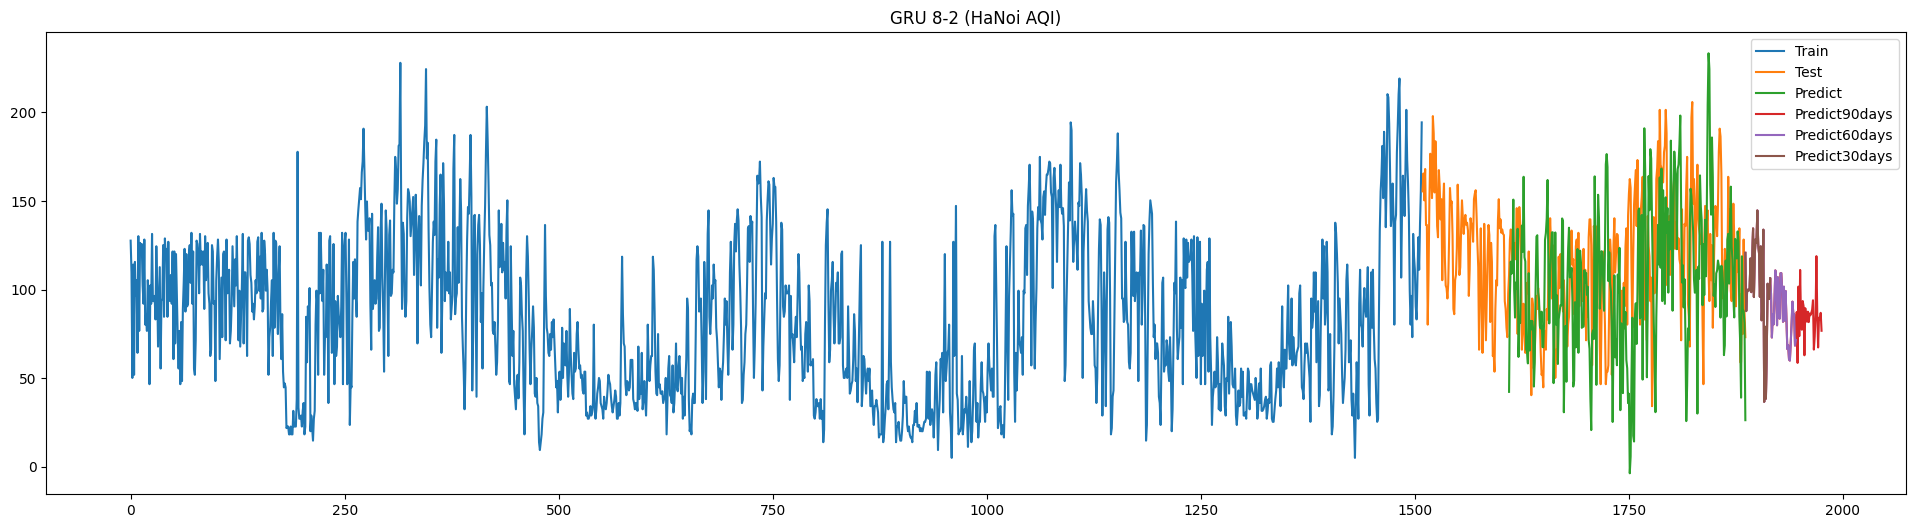

<Figure size 640x480 with 0 Axes>

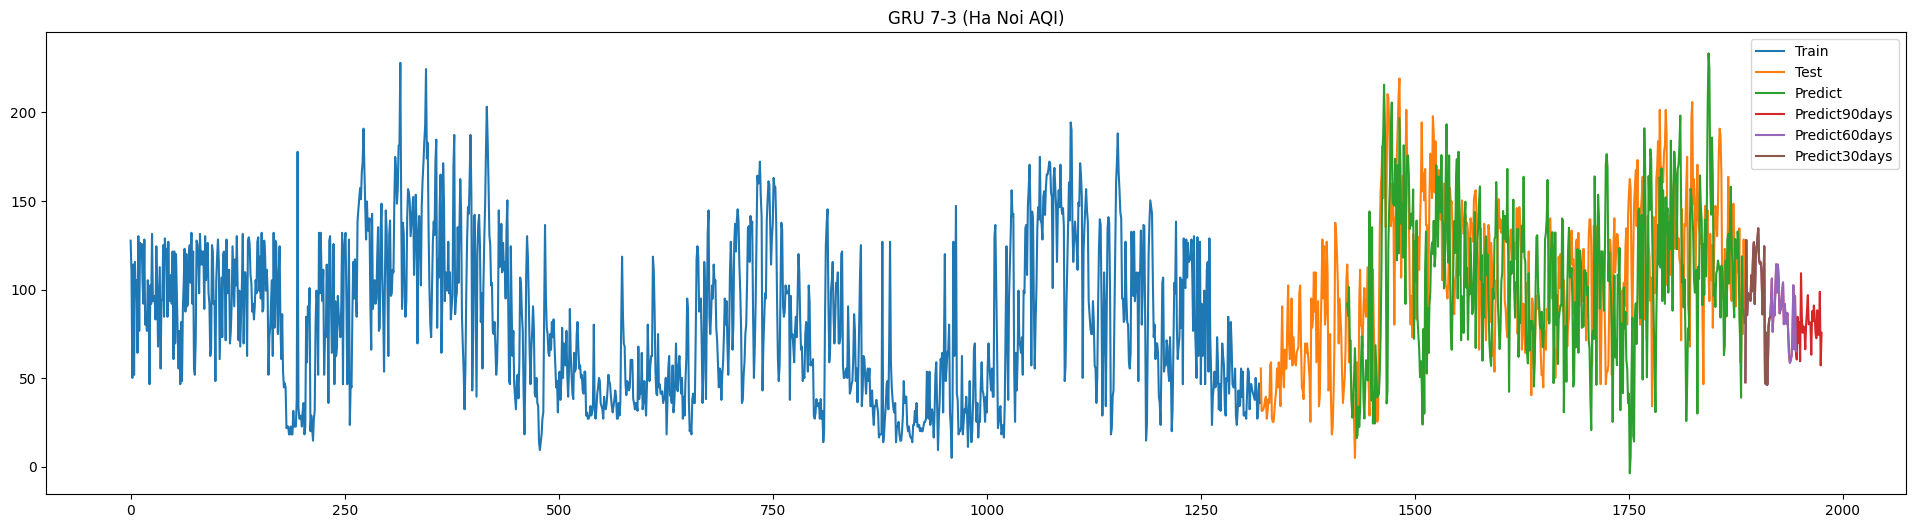

<Figure size 640x480 with 0 Axes>

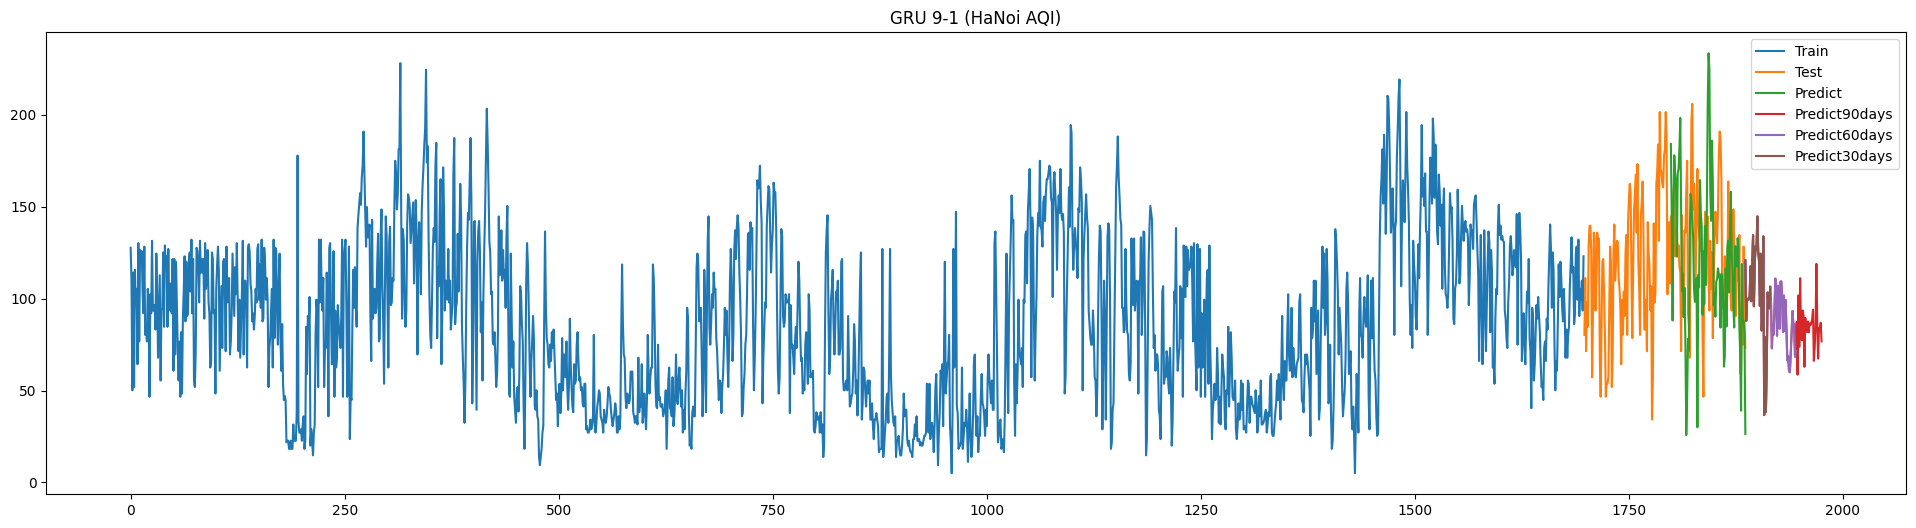

<Figure size 640x480 with 0 Axes>

In [62]:
# Vẽ hình data HaNoi
## 8-2
plt.figure(figsize=(24, 6))
plt.title('GRU 8-2 (HaNoi AQI)')
train_data_index = pd.RangeIndex(start=0, stop=train_size_HaNoi_80, step=1)
plt.plot(scaler.inverse_transform(train_data_HaNoi_80))

test_data_index = pd.RangeIndex(start=train_size_HaNoi_80, stop=train_size_HaNoi_80+test_size_HaNoi_20, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_HaNoi_20))

test_data_index = pd.RangeIndex(start=train_size_HaNoi_80+101, stop=train_size_HaNoi_80+test_size_HaNoi_20, step=1)
plt.plot(test_data_index,y_pred_HaNoi_8_2)

#predict index
prediect_data_index_30 = pd.RangeIndex(start=len(df1_HaNoi)-1, stop=len(df1_HaNoi)+29, step=1)
prediect_data_index_60 = pd.RangeIndex(start=len(df1_HaNoi)-1, stop=len(df1_HaNoi)+59, step=1)
prediect_data_index_90 = pd.RangeIndex(start=len(df1_HaNoi)-1, stop=len(df1_HaNoi)+89, step=1)

#plot
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_HaNoi_8_2_90))
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_HaNoi_8_2_60))
plt.plot(prediect_data_index_30,scaler.inverse_transform(lst_output_HaNoi_8_2_30))

plt.legend(['Train','Test','Predict','Predict90days','Predict60days','Predict30days'])
plt.show()
plt.savefig('GRU_HaNoi_8-2.png')

## 7 -3
plt.figure(figsize=(24, 6))
plt.title('GRU 7-3 (Ha Noi AQI)')
train_data_index = pd.RangeIndex(start=0, stop=train_size_HaNoi_70, step=1)
plt.plot(scaler.inverse_transform(train_data_HaNoi_70))

test_data_index = pd.RangeIndex(start=train_size_HaNoi_70, stop=train_size_HaNoi_70+test_size_HaNoi_30-1, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_HaNoi_30))

test_data_index = pd.RangeIndex(start=train_size_HaNoi_70+101, stop=train_size_HaNoi_70+test_size_HaNoi_30-1, step=1)
plt.plot(test_data_index,y_pred_HaNoi_7_3)

#predict index
prediect_data_index_30 = pd.RangeIndex(start=len(df1_HaNoi)-1, stop=len(df1_HaNoi)+29, step=1)
prediect_data_index_60 = pd.RangeIndex(start=len(df1_HaNoi)-1, stop=len(df1_HaNoi)+59, step=1)
prediect_data_index_90 = pd.RangeIndex(start=len(df1_HaNoi)-1, stop=len(df1_HaNoi)+89, step=1)

#plot
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_HaNoi_7_3_90))
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_HaNoi_7_3_60))
plt.plot(prediect_data_index_30,scaler.inverse_transform(lst_output_HaNoi_7_3_30))

plt.legend(['Train','Test','Predict','Predict90days','Predict60days','Predict30days'])
plt.show()
plt.savefig('GRU_HaNoi_7-3.png')

## 9-1
plt.figure(figsize=(24, 6))
plt.title('GRU 9-1 (HaNoi AQI)')
train_data_index = pd.RangeIndex(start=0, stop=train_size_HaNoi_90, step=1)
plt.plot(scaler.inverse_transform(train_data_HaNoi_90))

test_data_index = pd.RangeIndex(start=train_size_HaNoi_90, stop=train_size_HaNoi_90+test_size_HaNoi_10, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_HaNoi_10))

test_data_index = pd.RangeIndex(start=train_size_HaNoi_90+101, stop=train_size_HaNoi_90+test_size_HaNoi_10, step=1)
plt.plot(test_data_index,y_pred_HaNoi_9_1)

#predict index
prediect_data_index_30 = pd.RangeIndex(start=len(df1_HaNoi)-1, stop=len(df1_HaNoi)+29, step=1)
prediect_data_index_60 = pd.RangeIndex(start=len(df1_HaNoi)-1, stop=len(df1_HaNoi)+59, step=1)
prediect_data_index_90 = pd.RangeIndex(start=len(df1_HaNoi)-1, stop=len(df1_HaNoi)+89, step=1)

#plot
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_HaNoi_9_1_90))
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_HaNoi_9_1_60))
plt.plot(prediect_data_index_30,scaler.inverse_transform(lst_output_HaNoi_9_1_30))

plt.legend(['Train','Test','Predict','Predict90days','Predict60days','Predict30days'])
plt.show()
plt.savefig('GRU_HaNoi_9_1.png')

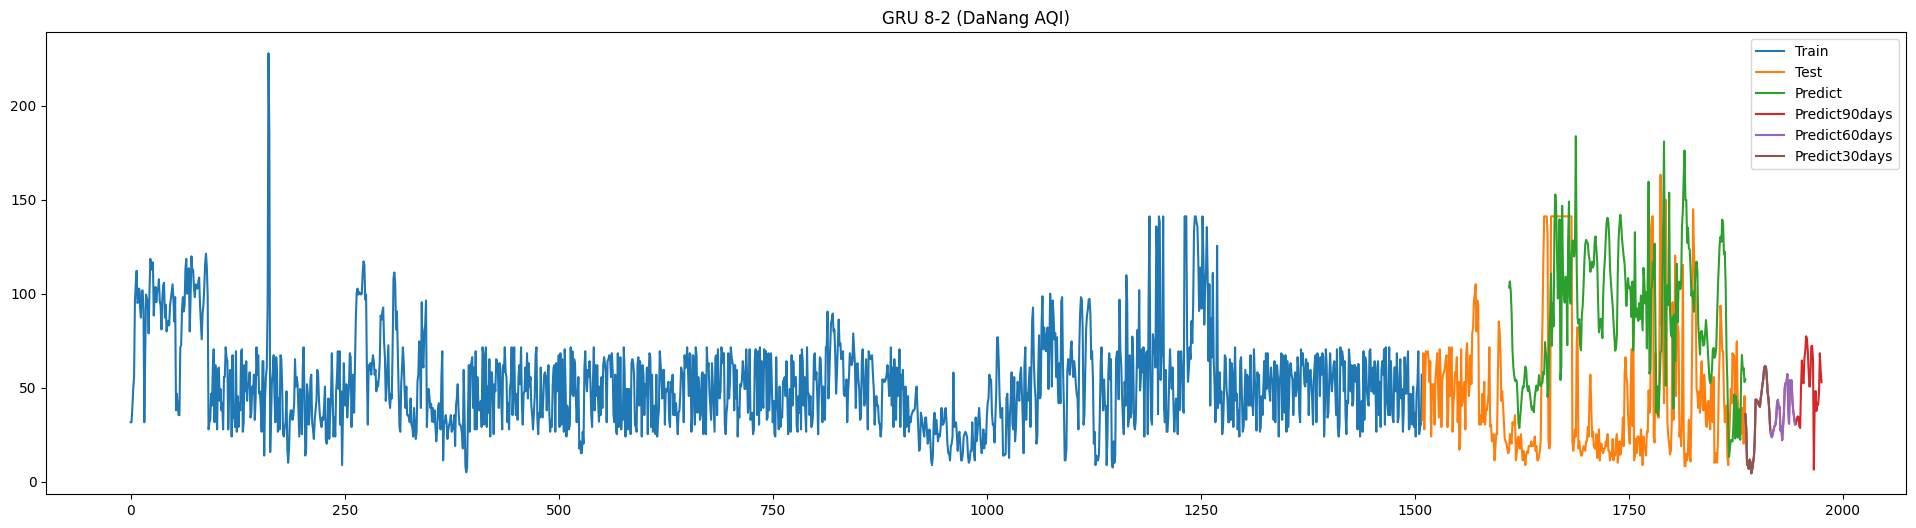

<Figure size 640x480 with 0 Axes>

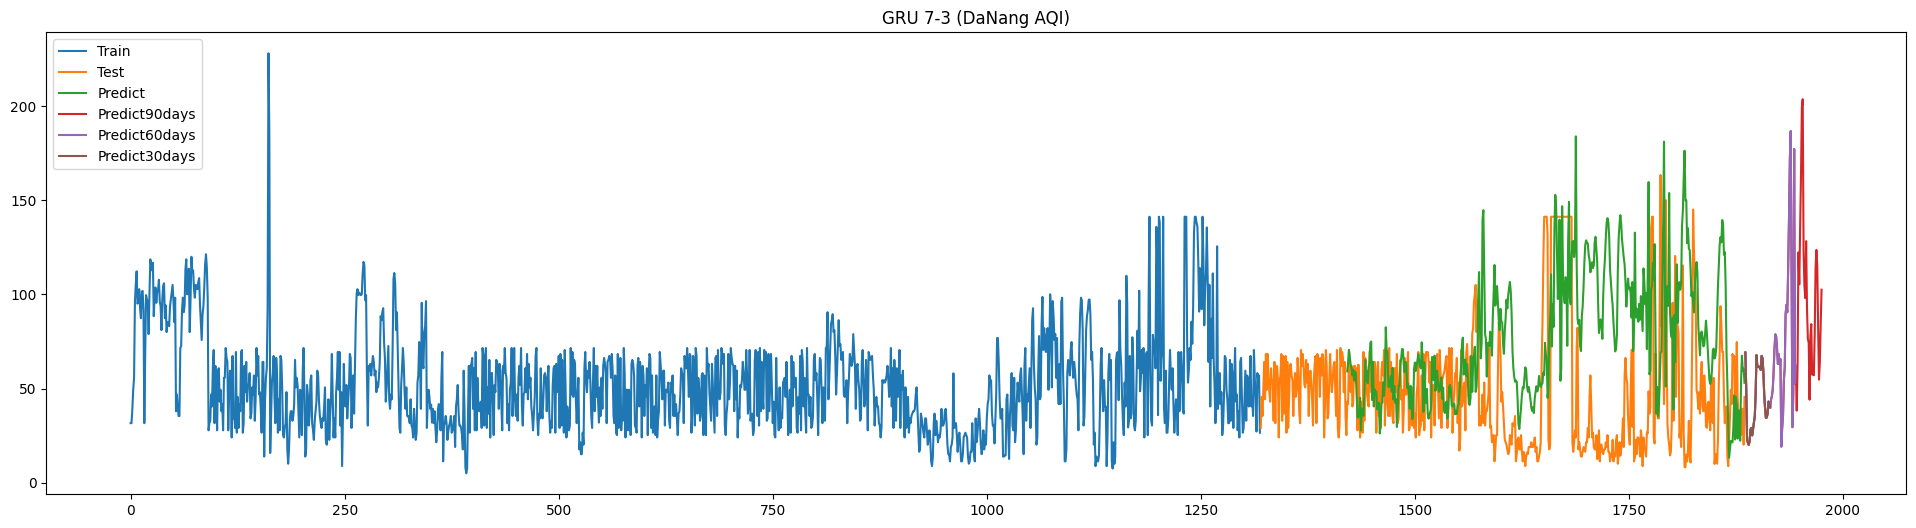

<Figure size 640x480 with 0 Axes>

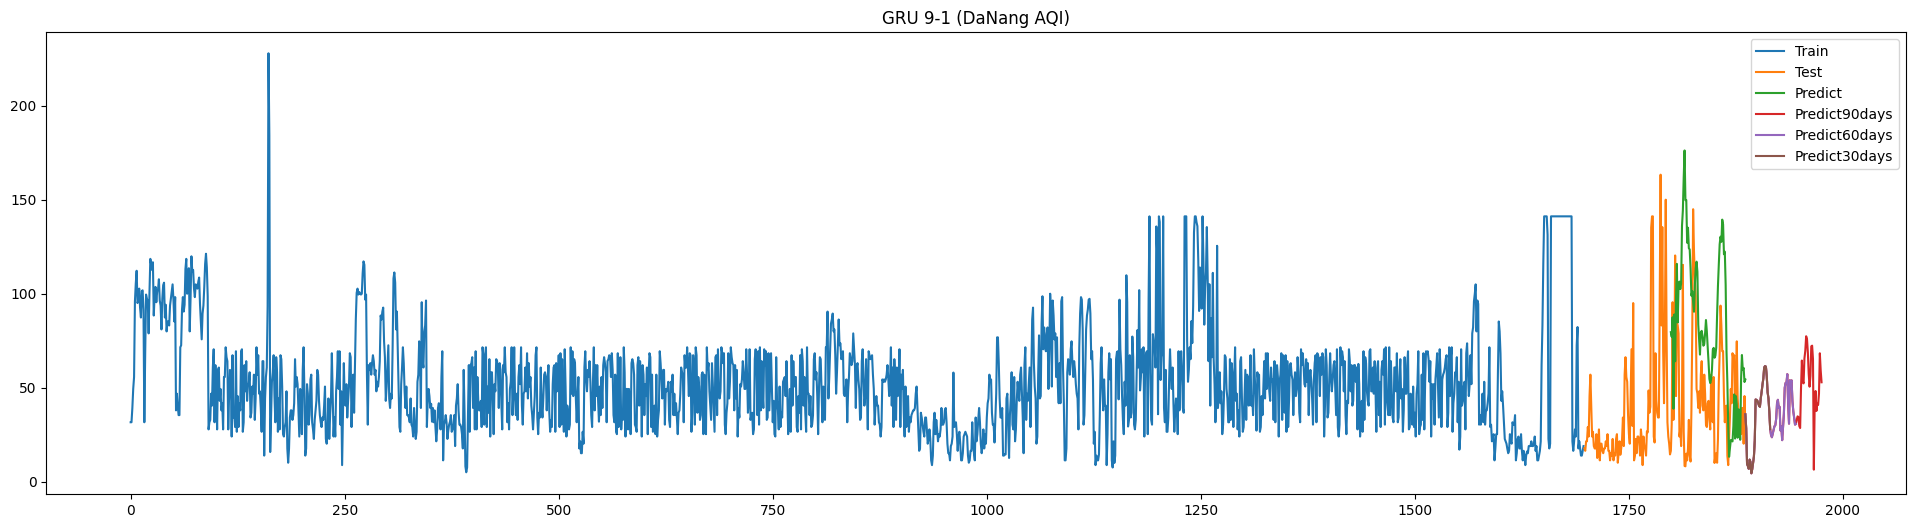

<Figure size 640x480 with 0 Axes>

In [64]:
# Vẽ hình data DaNang
## 8 -2
plt.figure(figsize=(24, 6))
plt.title('GRU 8-2 (DaNang AQI)')
train_data_index = pd.RangeIndex(start=0, stop=train_size_DaNang_80, step=1)
plt.plot(scaler.inverse_transform(train_data_DaNang_80))

test_data_index = pd.RangeIndex(start=train_size_DaNang_80, stop=train_size_DaNang_80+test_size_DaNang_20, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_DaNang_20))

test_data_index = pd.RangeIndex(start=train_size_DaNang_80+101, stop=train_size_DaNang_80+test_size_DaNang_20, step=1)
plt.plot(test_data_index,y_pred_DaNang_8_2)

#predict index
prediect_data_index_30 = pd.RangeIndex(start=len(df1_DaNang)-1, stop=len(df1_DaNang)+29, step=1)
prediect_data_index_60 = pd.RangeIndex(start=len(df1_DaNang)-1, stop=len(df1_DaNang)+59, step=1)
prediect_data_index_90 = pd.RangeIndex(start=len(df1_DaNang)-1, stop=len(df1_DaNang)+89, step=1)

#plot
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_DaNang_8_2_90))
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_DaNang_8_2_60))
plt.plot(prediect_data_index_30,scaler.inverse_transform(lst_output_DaNang_8_2_30))

plt.legend(['Train','Test','Predict','Predict90days','Predict60days','Predict30days'])
plt.show()
plt.savefig('GRU_DaNang_8-2.png')

## 7 -3
plt.figure(figsize=(24, 6))
plt.title('GRU 7-3 (DaNang AQI)')
train_data_index = pd.RangeIndex(start=0, stop=train_size_DaNang_70, step=1)
plt.plot(scaler.inverse_transform(train_data_DaNang_70))

test_data_index = pd.RangeIndex(start=train_size_DaNang_70, stop=train_size_DaNang_70+test_size_DaNang_30-1, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_DaNang_30))

test_data_index = pd.RangeIndex(start=train_size_DaNang_70+101, stop=train_size_DaNang_70+test_size_DaNang_30-1, step=1)
plt.plot(test_data_index,y_pred_DaNang_7_3)

#predict index
prediect_data_index_30 = pd.RangeIndex(start=len(df1_DaNang)-1, stop=len(df1_DaNang)+29, step=1)
prediect_data_index_60 = pd.RangeIndex(start=len(df1_DaNang)-1, stop=len(df1_DaNang)+59, step=1)
prediect_data_index_90 = pd.RangeIndex(start=len(df1_DaNang)-1, stop=len(df1_DaNang)+89, step=1)

#plot
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_DaNang_7_3_90))
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_DaNang_7_3_60))
plt.plot(prediect_data_index_30,scaler.inverse_transform(lst_output_DaNang_7_3_30))

plt.legend(['Train','Test','Predict','Predict90days','Predict60days','Predict30days'])
plt.show()
plt.savefig('GRU_DaNang_7-3.png')

## 9-1
plt.figure(figsize=(24, 6))
plt.title('GRU 9-1 (DaNang AQI)')
train_data_index = pd.RangeIndex(start=0, stop=train_size_DaNang_90, step=1)
plt.plot(scaler.inverse_transform(train_data_DaNang_90))

test_data_index = pd.RangeIndex(start=train_size_DaNang_90, stop=train_size_DaNang_90+test_size_DaNang_10, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_DaNang_10))

test_data_index = pd.RangeIndex(start=train_size_DaNang_90+101, stop=train_size_DaNang_90+test_size_DaNang_10, step=1)
plt.plot(test_data_index,y_pred_DaNang_9_1)

#predict index
prediect_data_index_30 = pd.RangeIndex(start=len(df1_DaNang)-1, stop=len(df1_DaNang)+29, step=1)
prediect_data_index_60 = pd.RangeIndex(start=len(df1_DaNang)-1, stop=len(df1_DaNang)+59, step=1)
prediect_data_index_90 = pd.RangeIndex(start=len(df1_DaNang)-1, stop=len(df1_DaNang)+89, step=1)

#plot
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_DaNang_9_1_90))
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_DaNang_9_1_60))
plt.plot(prediect_data_index_30,scaler.inverse_transform(lst_output_DaNang_9_1_30))

plt.legend(['Train','Test','Predict','Predict90days','Predict60days','Predict30days'])
plt.show()
plt.savefig('GRU_DaNang_9_1.png')

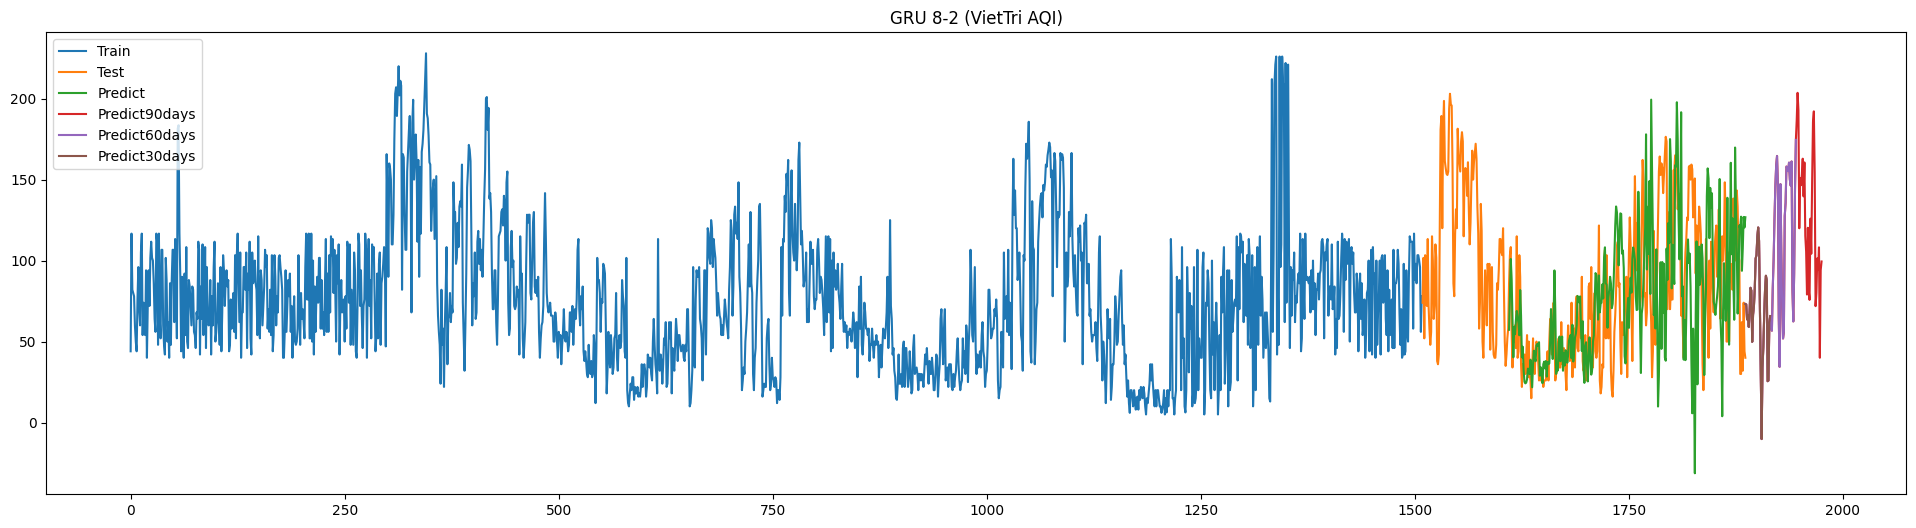

<Figure size 640x480 with 0 Axes>

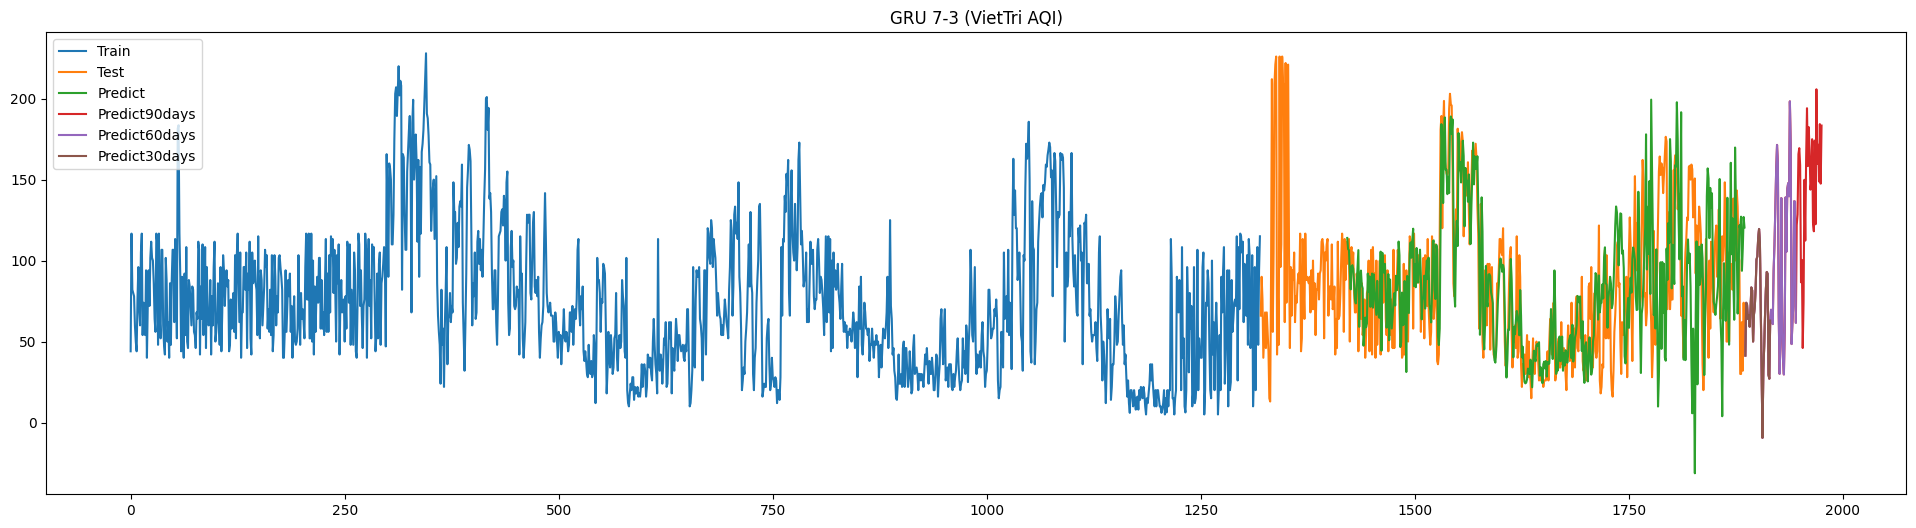

<Figure size 640x480 with 0 Axes>

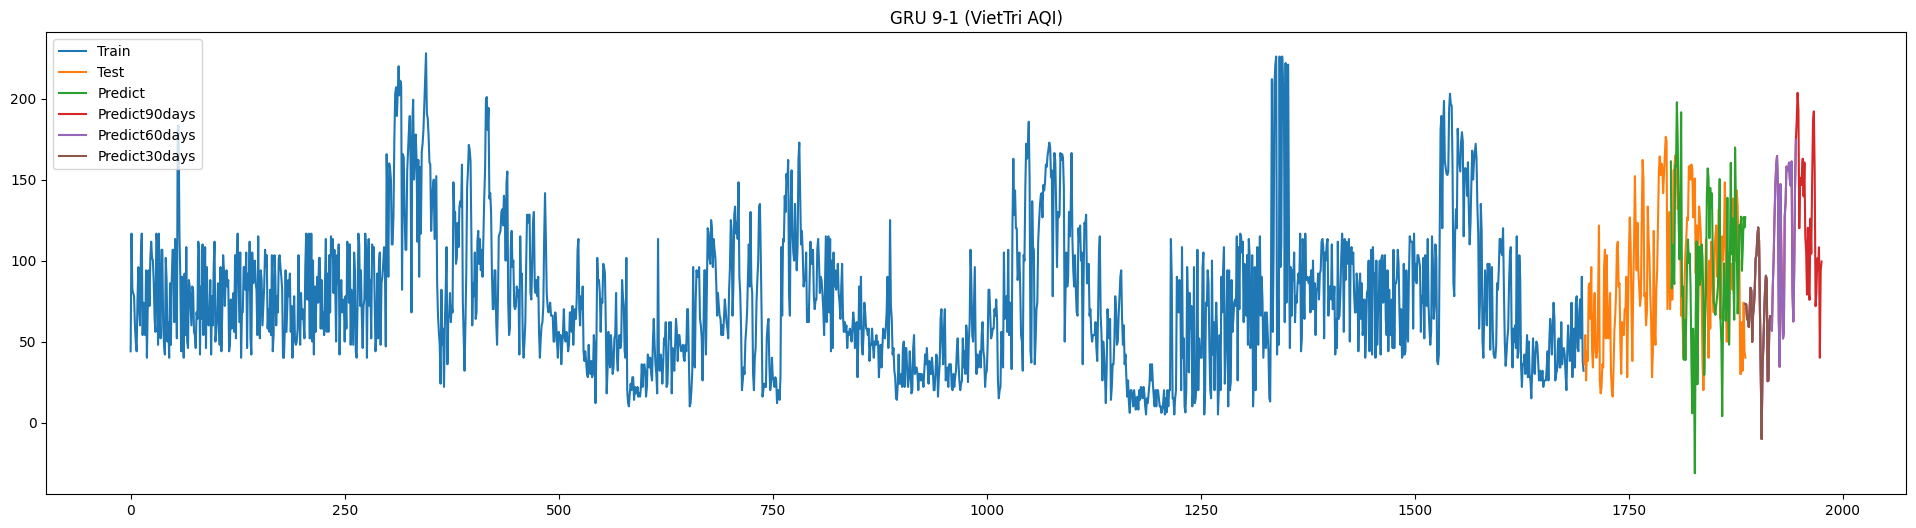

<Figure size 640x480 with 0 Axes>

In [68]:
# Vẽ hình data VietTri
## 8 -2
plt.figure(figsize=(24, 6))
plt.title('GRU 8-2 (VietTri AQI)')
train_data_index = pd.RangeIndex(start=0, stop=train_size_VietTri_80, step=1)
plt.plot(scaler.inverse_transform(train_data_VietTri_80))

test_data_index = pd.RangeIndex(start=train_size_VietTri_80, stop=train_size_VietTri_80+test_size_VietTri_20, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_VietTri_20))

test_data_index = pd.RangeIndex(start=train_size_VietTri_80+101, stop=train_size_VietTri_80+test_size_VietTri_20, step=1)
plt.plot(test_data_index,y_pred_VietTri_8_2)

#predict index
prediect_data_index_30 = pd.RangeIndex(start=len(df1_VietTri)-1, stop=len(df1_VietTri)+29, step=1)
prediect_data_index_60 = pd.RangeIndex(start=len(df1_VietTri)-1, stop=len(df1_VietTri)+59, step=1)
prediect_data_index_90 = pd.RangeIndex(start=len(df1_VietTri)-1, stop=len(df1_VietTri)+89, step=1)

#plot
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_VietTri_8_2_90))
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_VietTri_8_2_60))
plt.plot(prediect_data_index_30,scaler.inverse_transform(lst_output_VietTri_8_2_30))

plt.legend(['Train','Test','Predict','Predict90days','Predict60days','Predict30days'])
plt.show()
plt.savefig('GRU_VietTri_8-2.png')

## 7 -3
plt.figure(figsize=(24, 6))
plt.title('GRU 7-3 (VietTri AQI)')
train_data_index = pd.RangeIndex(start=0, stop=train_size_VietTri_70, step=1)
plt.plot(scaler.inverse_transform(train_data_VietTri_70))

test_data_index = pd.RangeIndex(start=train_size_VietTri_70, stop=train_size_VietTri_70+test_size_VietTri_30-1, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_VietTri_30))

test_data_index = pd.RangeIndex(start=train_size_VietTri_70+101, stop=train_size_VietTri_70+test_size_VietTri_30-1, step=1)
plt.plot(test_data_index,y_pred_VietTri_7_3)

#predict index
prediect_data_index_30 = pd.RangeIndex(start=len(df1_VietTri)-1, stop=len(df1_VietTri)+29, step=1)
prediect_data_index_60 = pd.RangeIndex(start=len(df1_VietTri)-1, stop=len(df1_VietTri)+59, step=1)
prediect_data_index_90 = pd.RangeIndex(start=len(df1_VietTri)-1, stop=len(df1_VietTri)+89, step=1)

#plot
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_VietTri_7_3_90))
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_VietTri_7_3_60))
plt.plot(prediect_data_index_30,scaler.inverse_transform(lst_output_VietTri_7_3_30))

plt.legend(['Train','Test','Predict','Predict90days','Predict60days','Predict30days'])
plt.show()
plt.savefig('GRU_VietTri_7-3.png')

## 9-1
plt.figure(figsize=(24, 6))
plt.title('GRU 9-1 (VietTri AQI)')
train_data_index = pd.RangeIndex(start=0, stop=train_size_VietTri_90, step=1)
plt.plot(scaler.inverse_transform(train_data_VietTri_90))

test_data_index = pd.RangeIndex(start=train_size_VietTri_90, stop=train_size_VietTri_90+test_size_VietTri_10, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_VietTri_10))

test_data_index = pd.RangeIndex(start=train_size_VietTri_90+101, stop=train_size_VietTri_90+test_size_VietTri_10, step=1)
plt.plot(test_data_index,y_pred_VietTri_9_1)

#predict index
prediect_data_index_30 = pd.RangeIndex(start=len(df1_VietTri)-1, stop=len(df1_VietTri)+29, step=1)
prediect_data_index_60 = pd.RangeIndex(start=len(df1_VietTri)-1, stop=len(df1_VietTri)+59, step=1)
prediect_data_index_90 = pd.RangeIndex(start=len(df1_VietTri)-1, stop=len(df1_VietTri)+89, step=1)

#plot
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_VietTri_9_1_90))
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_VietTri_9_1_60))
plt.plot(prediect_data_index_30,scaler.inverse_transform(lst_output_VietTri_9_1_30))

plt.legend(['Train','Test','Predict','Predict90days','Predict60days','Predict30days'])
plt.show()
plt.savefig('GRU_VietTri_9_1.png')